Problem statement:

This may be one of the most challenging Tabular Playground competitions to date! It just so happens that one of Kaggle's software engineers is an avid Rocket League player and he's assembled a dataset of Rocket League gameplay for this month's TPS.

This month's challenge is to, given a snapshot from a Rocket League match, predict the probability of each team scoring within the next 10 seconds of the game. Sounds awesome, right?

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

"pwd" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [8]:
#Read files - Will user train_1.csv file 
train_1 = pd.read_csv("./data/train_1.csv")
train_1

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,738,738001,-182.318400,-0.0000,0.000000,1.8548,-0.000000,0.000000,0.0000,0.520000,...,0.000,0.0,0.0,0.0,0.000,0.000,4,B,0,0
1,738,738001,-182.218400,-0.0000,0.000000,1.8548,-0.000000,0.000000,0.0000,1.215800,...,0.000,0.0,0.0,0.0,0.000,0.000,4,B,0,0
2,738,738001,-182.118410,-0.0000,0.000000,1.8548,-0.000000,0.000000,0.0000,1.927400,...,0.000,0.0,0.0,0.0,0.000,0.000,4,B,0,0
3,738,738001,-182.018400,-0.0000,0.000000,1.8548,-0.000000,0.000000,0.0000,2.987600,...,0.000,0.0,0.0,0.0,0.000,0.000,4,B,0,0
4,738,738001,-181.918400,-0.0000,0.000000,1.8548,-0.000000,0.000000,0.0000,4.650200,...,0.000,0.0,0.0,0.0,0.000,0.000,4,B,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168769,1474,1474006,-0.433335,-9.2734,91.153206,4.4726,47.566402,33.902000,-5.8518,-66.129196,...,-4.434,0.0,0.0,0.0,-3.732,-9.970,2,A,1,0
2168770,1474,1474006,-0.333334,-5.3154,93.974200,3.9360,47.444400,33.816000,-6.9184,-67.409000,...,-4.332,0.0,0.0,0.0,-3.633,-9.870,2,A,1,0
2168771,1474,1474006,-0.233334,0.2090,97.911800,3.0358,47.274800,33.695602,-8.4068,-68.017000,...,-4.234,0.0,0.0,0.0,-3.533,-9.766,2,A,1,0
2168772,1474,1474006,-0.133334,3.7500,100.435800,2.3654,47.166800,33.618202,-9.3610,-68.685800,...,-4.133,0.0,0.0,0.0,-3.434,-9.664,2,A,1,0


In [11]:
from tqdm import tqdm

INPUT = './'

df_train_dtypes = pd.read_csv(INPUT + 'train_dtypes.csv')
df_test_dtypes = pd.read_csv(INPUT + 'test_dtypes.csv')
train_dtypes = {k: v for (k, v) in zip(df_train_dtypes.column, df_train_dtypes.dtype)}
test_dtypes = {k: v for (k, v) in zip(df_test_dtypes.column, df_test_dtypes.dtype)}

train_list = []

for i in tqdm(range(1)):
    train_list.append(pd.read_csv(INPUT + 'data/'+f'train_{i}.csv', dtype = train_dtypes))
    
train_list

100%|██████████| 1/1 [00:09<00:00,  9.06s/it]


[         game_num  event_id  event_time  ball_pos_x  ball_pos_y  ball_pos_z  \
 0               1      1002  -33.313030     -0.0000    0.000000    1.854800   
 1               1      1002  -33.206146     -0.0000    0.000000    1.854800   
 2               1      1002  -33.098114     -0.0000    0.000000    1.854800   
 3               1      1002  -32.993191     -0.0000    0.000000    1.854800   
 4               1      1002  -32.887756     -0.0000    0.000000    1.854800   
 ...           ...       ...         ...         ...         ...         ...   
 2149376       737    737005   -0.473386     11.6650   25.500801   15.000999   
 2149377       737    737005   -0.363688     10.3796   31.146999   18.421200   
 2149378       737    737005   -0.254574      9.1902   36.371002   21.428001   
 2149379       737    737005   -0.145479      8.1868   40.778202   23.845400   
 2149380       737    737005   -0.036366      7.0956   45.572201   26.350201   
 
          ball_vel_x  ball_vel_y  ball

In [12]:
test = pd.read_csv(INPUT + 'data/' +'test.csv', dtype = test_dtypes)
test

,id,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,...,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
0,0,-56.270802,29.510000,17.348600,24.499399,-1.311400,11.006801,-35.776199,73.136803,1.2480,...,3.948400,-16.710800,0.0074,71.00000,0.000000,-3.263672,-6.132812,-6.875000,-7.015625,-3.230469
1,1,2.852800,70.195999,8.949000,-8.152200,-65.577202,18.536400,22.926001,87.543800,0.3396,...,-15.496800,-14.876600,0.0050,66.68750,0.000000,-1.615234,-5.968750,-5.503906,0.000000,-6.511719
2,2,52.366402,-98.036797,14.249001,-2.000000,-45.291401,-15.423400,51.288998,-102.055595,6.3570,...,0.905800,-27.413601,0.0042,80.37500,-0.031586,0.000000,0.000000,-3.128906,0.000000,-3.677734
3,3,36.365402,53.961403,23.161798,24.829399,-10.328600,-0.918000,16.424799,0.932800,0.3402,...,-5.053200,-15.106999,0.0052,96.06250,-6.429688,-4.089844,-7.832031,-5.761719,0.000000,-3.923828
4,4,-23.262400,-53.391003,21.209600,-1.667600,-24.778799,3.481200,-19.681801,-93.913605,4.7832,...,22.200001,24.928001,0.0042,0.00000,-9.882812,0.000000,-0.445557,-0.491455,-7.828125,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701138,701138,-4.403200,97.837196,1.947000,-17.187401,5.800400,-0.919400,36.585201,45.022999,1.5646,...,-8.230801,-10.698600,-5.4644,0.39209,0.000000,0.000000,0.000000,-3.521484,0.000000,-7.839844
701139,701139,-74.574600,-62.988998,5.712600,15.206400,-21.422400,0.637800,-81.560600,-48.214001,15.5750,...,-5.291400,-15.463000,6.6894,0.00000,-4.269531,0.000000,-7.964844,0.000000,0.000000,0.000000
701140,701140,-42.743397,-52.765602,4.220400,8.849800,32.853401,17.899399,10.959001,-39.320602,1.9344,...,16.518801,-31.844599,0.0046,100.00000,0.000000,-7.625000,-9.929688,0.000000,0.000000,0.000000
701141,701141,18.133001,-98.273796,32.703400,-5.788400,-60.722599,-5.504600,30.581999,13.514000,0.3402,...,7.217400,-26.050600,0.0054,91.75000,0.000000,-0.161743,0.000000,-2.152344,-0.377197,-2.003906


In [13]:
submission = pd.read_csv(INPUT + 'sample_submission.csv')
submission

,id,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
701138,701138,0,0
701139,701139,0,0
701140,701140,0,0
701141,701141,0,0


In [14]:
print(train_list[0].shape)
print(test.shape)
print(submission.shape)

(2149381, 61)
(701143, 55)
(701143, 3)


In [30]:
#Diferenecia de columnas de trian y test    
a=list(train_dtypes)
len(a)
b = list(test_dtypes)
len(b)
xx = [c for c in a if c not in b]
xx

['game_num',
 'event_id',
 'event_time',
 'player_scoring_next',
 'team_scoring_next',
 'team_A_scoring_within_10sec',
 'team_B_scoring_within_10sec']

In [87]:
ones = [e for e in train_list[0]['team_A_scoring_within_10sec'][:] ]
sum(ones)

125332

In [88]:
ones = [e for e in train_list[0]['team_B_scoring_within_10sec'][:] ]
sum(ones)

119834

<AxesSubplot:ylabel='Frequency'>

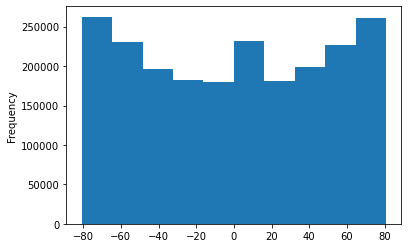

In [94]:
#train_list[0]['ball_pos_x'][:]
train_list[0]['ball_pos_x'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

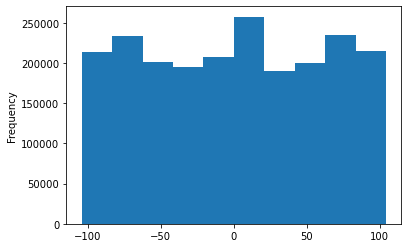

In [95]:
train_list[0]['ball_pos_y'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

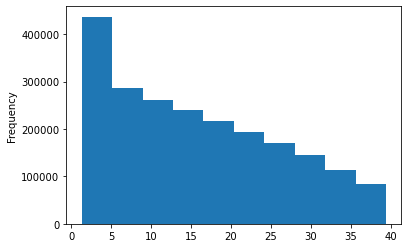

In [96]:
train_list[0]['ball_pos_z'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

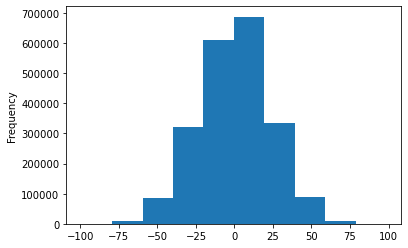

In [101]:
train_list[0]['ball_vel_x'].plot(kind='hist')
#train_list[0]['ball_vel_y'].plot(kind='hist')
#train_list[0]['ball_vel_z'].plot(kind='hist')

In [102]:
train_list[0]['team_A_scoring_within_10sec'][:]

0          0
1          0
2          0
3          0
4          0
          ..
2149376    0
2149377    0
2149378    0
2149379    0
2149380    0
Name: team_A_scoring_within_10sec, Length: 2149381, dtype: int8

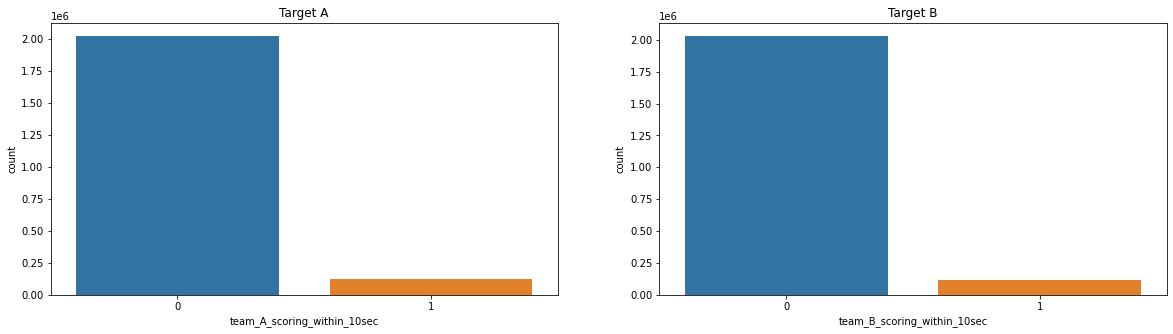

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=train_list[0], x='team_A_scoring_within_10sec')
plt.title('Target A')

plt.subplot(1,2,2)
sns.countplot(data=train_list[0], x='team_B_scoring_within_10sec')
plt.title('Target B')
plt.show()

In [10]:
print('Team A target mean', train_list[0]['team_A_scoring_within_10sec'].mean())
print('Team B target mean', train_list[0]['team_B_scoring_within_10sec'].mean())

Team A target mean 0.058310741557685675
Team B target mean 0.05575279580493175


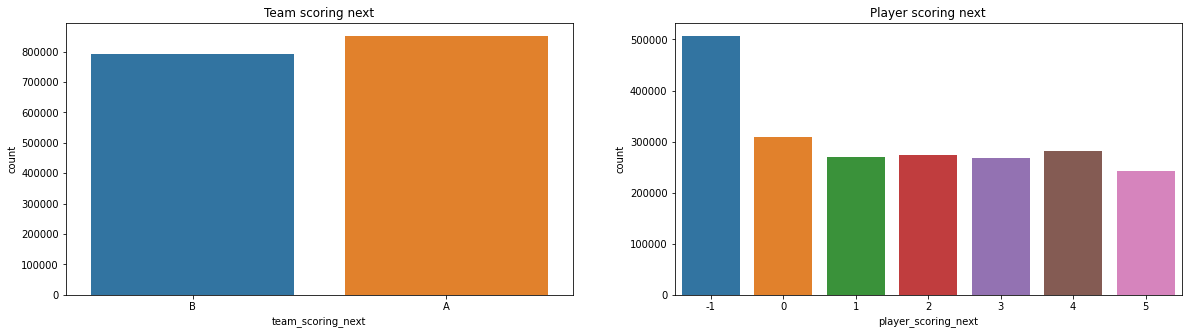

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=train_list[0], x='team_scoring_next')
plt.title('Team scoring next')

plt.subplot(1,2,2)
sns.countplot(data=train_list[0], x='player_scoring_next')
plt.title('Player scoring next')
plt.show()

In [89]:
y_a = train_list[0]['team_A_scoring_within_10sec']
y_b = train_list[0]['team_B_scoring_within_10sec']

X = train_list[0].drop(['game_num', 'event_id', 'event_time', 'player_scoring_next', \
                        'team_scoring_next', 'team_A_scoring_within_10sec', \
                        'team_B_scoring_within_10sec'], axis = 1)
X_test = test.drop(['id'], axis = 1)

X.shape, y_a.shape,y_b.shape, X_test.shape

((2149381, 54), (2149381,), (2149381,), (701143, 54))

In [90]:
from sklearn.model_selection import train_test_split

Xa_train, Xa_val, ya_train, ya_val = train_test_split(X, y_a, test_size=0.1, random_state=42, shuffle=True)
Xb_train, Xb_val, yb_train, yb_val = train_test_split(X, y_b, test_size=0.1, random_state=42, shuffle=True)

print(Xa_train.shape, Xa_val.shape, ya_train.shape, ya_val.shape)
print(Xb_train.shape, Xb_val.shape, yb_train.shape, yb_val.shape)

(1934442, 54) (214939, 54) (1934442,) (214939,)
(1934442, 54) (214939, 54) (1934442,) (214939,)


In [107]:
import lightgbm as lgb

#model_A = lgb.LGBMClassifier()
#model_B = lgb.LGBMClassifier()

model_A = lgb.LGBMClassifier(objective="binary", max_depth=8, num_leaves=64)
model_B = lgb.LGBMClassifier(objective="binary", max_depth=8, num_leaves=64)

model_A.fit(Xa_train,ya_train,eval_set = [(Xa_val,ya_val),(Xa_train,ya_train)])
model_B.fit(Xb_train,yb_train,eval_set = [(Xb_val,yb_val),(Xb_train,yb_train)])

#del train_1,Xa_train,ya_train,Xb_train,yb_train,Xa_val,ya_val,Xb_val,yb_val

[1]	training's binary_logloss: 0.217116	valid_0's binary_logloss: 0.214718
[2]	training's binary_logloss: 0.214044	valid_0's binary_logloss: 0.211838
[3]	training's binary_logloss: 0.211448	valid_0's binary_logloss: 0.209408
[4]	training's binary_logloss: 0.209433	valid_0's binary_logloss: 0.207557
[5]	training's binary_logloss: 0.207769	valid_0's binary_logloss: 0.206006
[6]	training's binary_logloss: 0.20631	valid_0's binary_logloss: 0.204667
[7]	training's binary_logloss: 0.205101	valid_0's binary_logloss: 0.203539
[8]	training's binary_logloss: 0.203982	valid_0's binary_logloss: 0.202472
[9]	training's binary_logloss: 0.203012	valid_0's binary_logloss: 0.201531
[10]	training's binary_logloss: 0.202134	valid_0's binary_logloss: 0.200676
[11]	training's binary_logloss: 0.201278	valid_0's binary_logloss: 0.199898
[12]	training's binary_logloss: 0.200345	valid_0's binary_logloss: 0.199088
[13]	training's binary_logloss: 0.199614	valid_0's binary_logloss: 0.198397
[14]	training's binary

LGBMClassifier(max_depth=8, num_leaves=64, objective='binary')

## Sobre Validation

In [112]:
scoreA = model_A.score(Xa_val, ya_val)
print(f"score: {scoreA*100}%")

scoreB = model_B.score(Xb_val, yb_val)
print(f"score: {scoreB*100}%")

score: 94.53147171988331%
score: 94.66685896928895%


## Sobre test

In [108]:
predict_A = model_A.predict_proba(X_test)[:,1]
predict_B = model_B.predict_proba(X_test)[:,1]

print(predict_A)
print(predict_B)

[0.03948924 0.01575856 0.01378912 ... 0.06758635 0.01520047 0.02669945]
[0.0310416  0.08401988 0.13336295 ... 0.03523551 0.37756098 0.03282381]


In [110]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predict_A, X_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(X_test, predict_A)))

ValueError: Input y_pred contains NaN.

In [109]:
submission["team_A_scoring_within_10sec"] = predict_A
submission["team_B_scoring_within_10sec"] = predict_B

display(submission)

submission.to_csv("submission.csv",index=False)

,id,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,0,0.039489,0.031042
1,1,0.015759,0.084020
2,2,0.013789,0.133363
3,3,0.065333,0.051614
4,4,0.024311,0.042671
...,...,...,...
701138,701138,0.366021,0.028663
701139,701139,0.030915,0.101774
701140,701140,0.067586,0.035236
701141,701141,0.015200,0.377561


In [111]:
#test
test_data = pd.read_csv("./data/test.csv")
test_data

,id,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,...,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
0,0,-56.270800,29.510000,17.348600,24.4994,-1.3114,11.006801,-35.776200,73.136800,1.2480,...,3.948400,-16.710800,0.0074,71.000,0.0000,-3.2640,-6.1330,-6.8750,-7.0160,-3.230
1,1,2.852800,70.196000,8.949000,-8.1522,-65.5772,18.536400,22.926000,87.543800,0.3396,...,-15.496800,-14.876600,0.0050,66.700,0.0000,-1.6150,-5.9700,-5.5040,0.0000,-6.510
2,2,52.366400,-98.036800,14.249001,-2.0000,-45.2914,-15.423400,51.288998,-102.055595,6.3570,...,0.905800,-27.413600,0.0042,80.400,-0.0316,0.0000,0.0000,-3.1290,0.0000,-3.678
3,3,36.365402,53.961403,23.161798,24.8294,-10.3286,-0.918000,16.424799,0.932800,0.3402,...,-5.053200,-15.106999,0.0052,96.060,-6.4300,-4.0900,-7.8320,-5.7600,0.0000,-3.924
4,4,-23.262400,-53.391003,21.209600,-1.6676,-24.7788,3.481200,-19.681800,-93.913605,4.7832,...,22.200000,24.928001,0.0042,0.000,-9.8800,0.0000,-0.4456,-0.4915,-7.8300,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701138,701138,-4.403200,97.837200,1.947000,-17.1874,5.8004,-0.919400,36.585200,45.023000,1.5646,...,-8.230801,-10.698600,-5.4644,0.392,0.0000,0.0000,0.0000,-3.5210,0.0000,-7.840
701139,701139,-74.574600,-62.989000,5.712600,15.2064,-21.4224,0.637800,-81.560600,-48.214000,15.5750,...,-5.291400,-15.463000,6.6894,0.000,-4.2700,0.0000,-7.9650,0.0000,0.0000,0.000
701140,701140,-42.743397,-52.765602,4.220400,8.8498,32.8534,17.899399,10.959001,-39.320602,1.9344,...,16.518800,-31.844599,0.0046,100.000,0.0000,-7.6250,-9.9300,0.0000,0.0000,0.000
701141,701141,18.133001,-98.273796,32.703400,-5.7884,-60.7226,-5.504600,30.581999,13.514000,0.3402,...,7.217400,-26.050600,0.0054,91.750,0.0000,-0.1617,0.0000,-2.1520,-0.3772,-2.004
